# Fisher Linear Discriminant

### Narayana Santhanam

We mentioned in class that we can use linear regression for binary classification, keeping the binary class labels as +/-1, and running linear regression with the class labels as the target. Fundamentally, this should give you pause. But let us see why this is interesting.

I have generated a bunch of points which are labeled +1 or -1. The points labeled +1 are the rows of the matrix Xplus, and the ones labeled -1 are the rows of the matrix Xminus. The plus category has 10 points, while the minus category has 15. The points are generated at random, you can see an overlap between them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import linalg as lin


import numpy.random as npr


Xplusx = npr.normal(1,2,(10,1))
Xplusy = npr.normal(1,3,(10,1))
Xplusz = npr.normal(1,5,(10,1))

Xplus = np.hstack((Xplusx,Xplusy,Xplusz))
yplus = np.ones((10,1))
Xminus = npr.normal(-1,2,(15,3))
yminus = -np.ones((15,1))


We plot the points below, the color of the points matches their class.

The mean of the set of the points in the "plus" category is muplus, while the mean of the set of points in the minus category is muminus.

In the cell below, (all problems below are done, but you can refer to them for code later):
1. Plot all the 25 points, with a separate color for each class (done for you already).
2. Find the mean of all the points with label +1, call it muplus. Similarly, for all points labeled -1, call their mean muminus (done already)
3. Draw the one-dimensional linear space containing the vector muplus-muminus (this is a line through the origin in the direction of the muplus-minus). Hint: ax.plot([x_1,x_2], [y_1,y_2], [z_1,z_2]) draws a line segment with (x_1, y_1, z_1) and (x_2, y_2, z_2) as their endpoints (done already).
4. Project muplus and muminus onto the line from part 3. Call these projections on the line muplusproj and muminusproj (done already).
5. Plot the points muplusproj and muminusproj (done for you already). Verify that these points are on the line you drew in 3, as they should be.

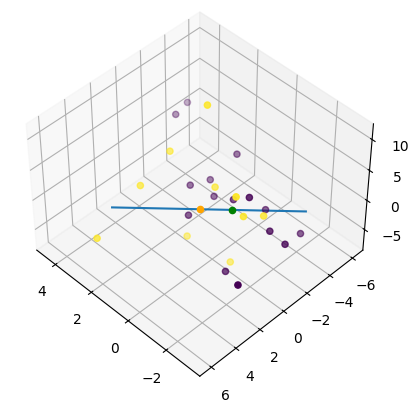

In [ ]:
# Problem 1
X = np.vstack((Xplus,Xminus))
y = np.vstack((yplus,yminus)).reshape(25,)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')
ax.scatter(X[:,0],X[:,1],X[:,2],c=100*y)

# Problem 2
muplus = np.mean(Xplus, axis=0)
muminus = np.mean(Xminus, axis=0)

# Problem 3
mu = np.vstack((muplus,muminus))
mu12 = np.array([[1,-1]]) @ mu
mu12 = mu12.reshape(3,1)

muline = np.array([[-3,0],[3,0]]) @ np.array([[1,-1],[0,0]]) @ mu
ax.plot(muline[:,0],muline[:,1],muline[:,2])

# Problem 4
muplusproj = mu12 @ mu12.T @ muplus.reshape(3,1)/(mu12.T @ mu12)
muminusproj = mu12 @ mu12.T @ muminus.reshape(3,1)/(mu12.T @ mu12)

# Problem 5
ax.scatter(muplusproj[0],muplusproj[1],muplusproj[2],c=['orange'])
ax.scatter(muminusproj[0],muminusproj[1],muminusproj[2],c=['green'])


ax.view_init(45,135)




Suppose we decide to ignore the 3 dimensions. Instead, we project all the points onto the direction of the line through muplus-muminus. This, as you know, is a 1-dimensional linear space.

6. Project all 25 points (the rows of Xplus and Xminus) onto the line you drew in problem 3 above.
7. Plot all the projections in the 3d plot below.

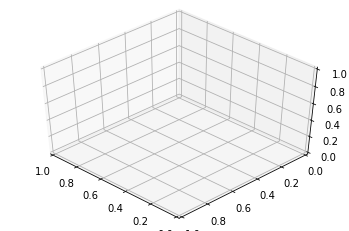

In [ ]:

# Problem 7
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

ax.view_init(45,135)


As you now see, the projections of the two classes are now somewhat mixed up. You can also see the projections of the means (the orange and green points), as well as the projections of the points in the two classes, the red and blue points. There is overlap between the classes. But since we projected in the direction of the line connecting muplus and muminus, the means are as far apart as they could possibly be in any one-dimensional projection (why?).

It is desirable that the means of the two classes be spaced as far apart as possible for good classification. But we should also keep in mind the spread of the (projections of) points in each class. Here, though the means are spaced apart, there may be overlap between the classes as well (since the data is randomly generated, you may see a heavy overlap or if you are lucky, a lighter overlap).

The question then is which direction works best. You can try different directions below:

8. Pick any direction w_1. Project all points (rows of Xplus and Xminus) into the one dimensional linear space along w_1.
Plot them below.

9. Pick a second direction w_2 such that w_1 and w_2 are linearly independent. Project all points (rows of Xplus and Xminus) onto the 2-d plane formed by w_1 and w_2. Plot them in the same picture as 8.

We want to space out the means as best as possible, but that is not the only thing to pay attention to. We want to only search among directions such that the scattering within classes to be less than some threshold (in future labs, we will see how to quantify this). The direction of the line between muplus and muminus may or may not satisfy the intra-class scattering constraint (more often than not, it will not).

So now we have a constrained optimization problem:

1. maximize some function of w (space out the means of the two classes as far as possible)
2. but w is only allowed to be chosen from vectors that satisfy a constraint (scattering within classes < threshold)

Exactly how we quantify the scattering will be examined when we look at eigenvalues and eigenvectors.

But here is where something miraculous happens. The best direction for the above constrained optimization is just the vector of coefficients of the Linear Regression problem where we fit the targets, +/-1 to the data, just as our "naive" approach to MNIST classification. So it isn't as naive after all---the approach picks the best one dimensional space for us to work in!

This direction is usually different from that of the line joining muplus and muminus. You may still see some overlap, but it is the direction that optimizes the dual constraints---maximizing separation between the class-means while minimizing the intra-class spread.

10. Fit the vector of targets to the data using linear regression. Make sure you use an intercept. Let w be the coefficients from the regression object.

11. Project all the points onto the 1-d linear space along w. Plot the projections below.

12. Find the angle between w and (muplus-muminus)